# Compare Solutions - MiniZephyr vs. Eurus

Brendan Smithyman & Shaun Hadden | November 2015

This notebook shows comparisons between the responses of the different solvers.

In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
from zephyr.backend import MiniZephyr, Eurus, SimpleSource, StackedSimpleSource

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
matplotlib.rcParams['savefig.dpi'] = 150 # Change this to adjust figure size

In [4]:
dx = 1.
dz = 1.
nx = 100
nz = 200
velocity    = 2000.
density     = 1.

nPML        = 10
freeSurf    = [False, False, False, False]
        
systemConfig = {
        'c':        velocity,  # m/s
        'rho':      density,     # kg/m^3
        'freq':     200.,    # Hz
        'nx':       nx,
        'nz':       nz,
        'dx':       dx,
        'dz':       dz,
        'nPML':     nPML,
        'cPML':     1e3,
        'freeSurf': freeSurf,
}

In [5]:
AinvE = Eurus(systemConfig)
AinvMZ = MiniZephyr(systemConfig)
SSS = StackedSimpleSource(systemConfig)
SS = SimpleSource(systemConfig)

xs, zs = 50, 100
sloc = np.array([xs, zs]).reshape((1,2))

qE = SSS(sloc)
qMZ = SS(sloc)
#q = np.hstack([q.T.ravel() / q.sum(), np.zeros(nx*nz, dtype=np.complex128)])
uMZ = AinvMZ*qMZ
uE = AinvE*qE

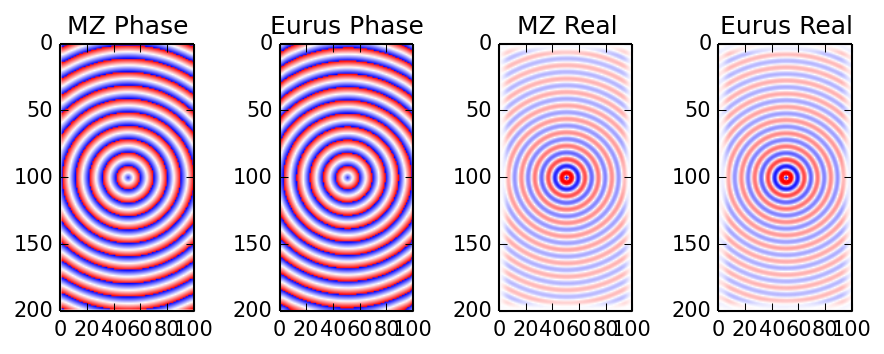

In [6]:
clip = 0.1

plotopts = {
    'vmin':     -np.pi,
    'vmax':     np.pi,
    'extent':   [0., dx * nx, dz * nz, 0.],
    'cmap':     cm.bwr,                
}

fig = plt.figure()

ax1 = fig.add_subplot(1,4,1)
plt.imshow(np.angle(uMZ.reshape((nz, nx))), **plotopts)
plt.title('MZ Phase')

ax2 = fig.add_subplot(1,4,2)
plt.imshow(np.angle(uE[:nx*nz].reshape((nz,nx))), **plotopts)
plt.title('Eurus Phase')

plotopts.update({
    'vmin':     -clip,
    'vmax':     clip,
})

ax3 = fig.add_subplot(1,4,3)
plt.imshow(uMZ.reshape((nz, nx)).real, **plotopts)
plt.title('MZ Real')

ax4 = fig.add_subplot(1,4,4)
plt.imshow(uE[:nx*nz].reshape((nz, nx)).real, **plotopts)
plt.title('Eurus Real')

fig.tight_layout()

## Z-trace comparison for MiniZephyr vs. the Eurus response

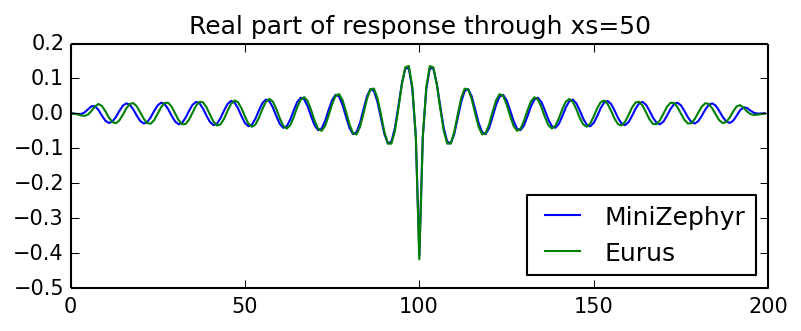

In [7]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1, aspect=100)

plt.plot(uMZ.real.reshape((nz, nx))[:,xs], label='MiniZephyr')
plt.plot(uE[:nx*nz].real.reshape((nz, nx))[:,xs], label='Eurus')
plt.legend(loc=4)
plt.title('Real part of response through xs=%d'%xs)